In [1]:
import matplotlib.pyplot as plt
import numpy as np
import probnum as pn
from probnum.problems.zoo.linalg import random_spd_matrix
import scipy.sparse

import linpde_gp

In [2]:
%matplotlib inline

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")

In [3]:
rng = np.random.default_rng(1)

In [4]:
A = random_spd_matrix(rng, dim=2, spectrum=[1.0, 0.1])
x = np.array([1.0, 1.0])
b = A @ x

In [5]:
linsys = pn.problems.LinearSystem(A, b, x)

In [6]:
linsys.solution

array([1., 1.])

In [7]:
obj_fn = lambda x: 0.5 * linpde_gp.linalg.euclidean_inprod(x, x, A) - linpde_gp.linalg.euclidean_inprod(b, x)

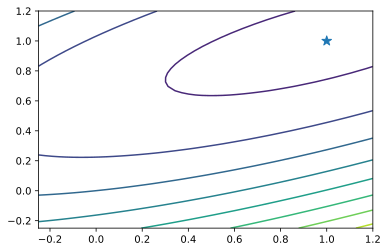

In [8]:
xs_plot, ys_plot = np.meshgrid(
    np.linspace(-0.25, 1.2),
    np.linspace(-0.25, 1.2),
)

plt.contour(
    xs_plot, ys_plot,
    obj_fn(np.stack((xs_plot, ys_plot), axis=-1))
)
plt.scatter(
    x[0], x[1],
    marker="*",
    s=100,
)

In [9]:
solver = linpde_gp.linalg.solvers.ProbabilisticLinearSolver(
    linpde_gp.linalg.solvers.beliefs.GaussianSolutionBelief.from_linear_system(linsys),
    policy=linpde_gp.linalg.solvers.policies.CovariancePolicy(),
    observation_op=linpde_gp.linalg.solvers.observation_ops.ResidualMatVec(),
    belief_update=linpde_gp.linalg.solvers.belief_updates.GaussianInferenceBeliefUpdate(noise_var=0.1),
    stopping_criteria=(
        linpde_gp.linalg.solvers.stopping_criteria.MaxIterations(10),
        linpde_gp.linalg.solvers.stopping_criteria.ResidualNorm(),
    ),
)

means = []

for belief, state, done in solver.solve_iter(linsys):
    means.append(belief.x.mean.copy())

In [10]:
belief.x.mean, belief.x.var

(array([0.02049193, 0.46844716]), array([8.1539683 , 1.47182313]))

In [11]:
means

[array([0., 0.]),
 array([-0.06748447,  0.42437472]),
 array([-0.05478535,  0.4306515 ]),
 array([-0.04303792,  0.43648152]),
 array([-0.03212219,  0.44192   ]),
 array([-0.0219389 ,  0.44701271]),
 array([-0.01240506,  0.45179799]),
 array([-0.00345061,  0.45630828]),
 array([0.00498408, 0.46057124]),
 array([0.01295019, 0.46461067]),
 array([0.02049193, 0.46844716])]

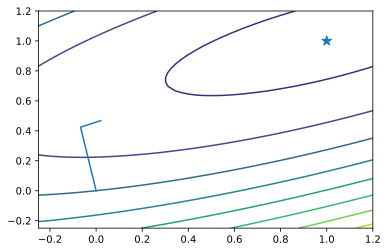

In [12]:
xs_plot, ys_plot = np.meshgrid(
    np.linspace(-0.25, 1.2),
    np.linspace(-0.25, 1.2),
)

plt.contour(
    xs_plot, ys_plot,
    obj_fn(np.stack((xs_plot, ys_plot), axis=-1))
)
plt.scatter(
    x[0], x[1],
    marker="*",
    s=100,
)
plt.plot(
    tuple(mean[0] for mean in means),
    tuple(mean[1] for mean in means),
)